In [6]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics.cluster import normalized_mutual_info_score, adjusted_rand_score
from sentence_transformers import SentenceTransformer
import numpy as np

'''
Variables: 
---------

corpus : list of documents
embeddings : documents embeddings of size NxM (N : number of documents, M : embedding dimension) 
red_emd : reduced embeddings matrix using dimentionality reduction
k : number of clusters
labels : documents labels
pred : list of clustering predicted clusters 

'''

'\nVariables: \n---------\n\ncorpus : list of documents\nembeddings : documents embeddings of size NxM (N : number of documents, M : embedding dimension) \nred_emd : reduced embeddings matrix using dimentionality reduction\nk : number of clusters\nlabels : documents labels\npred : list of clustering predicted clusters \n\n'

In [19]:
# import data
ng20 = fetch_20newsgroups(subset='test')
corpus = ng20.data[:2000]
labels = ng20.target[:2000]
k = len(set(labels))
print('Number of clusters: ', k)

# # embed data
model = SentenceTransformer('bert-base-nli-mean-tokens')
embeddings = model.encode(corpus)

# # save embeddings
# np.save('embeddings.npy', embeddings)

Number of clusters:  20


In [11]:
# # load embeddings
# embeddings = np.load('../embeddings.npy')

In [13]:
# tsne
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
red_emd = tsne.fit_transform(embeddings)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.000s...
[t-SNE] Computed neighbors for 2000 samples in 0.061s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 1.109058
[t-SNE] KL divergence after 50 iterations with early exaggeration: 72.596169
[t-SNE] KL divergence after 300 iterations: 1.888813


In [15]:
# kmeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=k, n_init=20)
pred = kmeans.fit_predict(red_emd)

In [16]:
# evaluation
nmi = normalized_mutual_info_score(labels, pred)
ari = adjusted_rand_score(labels, pred)
print('NMI :', nmi)
print('ARI :', ari)

NMI : 0.4254512305262381
ARI : 0.24510901648930378


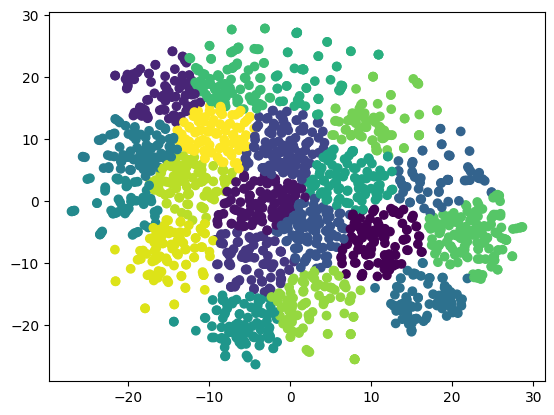

In [17]:
# visualization
import matplotlib.pyplot as plt
plt.scatter(red_emd[:,0], red_emd[:,1], c=pred)
plt.show()